In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D,Input,Lambda, Conv2DTranspose, Flatten

2024-08-27 09:28:59.101660: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 09:28:59.463940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 09:28:59.616106: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 09:28:59.648831: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 09:28:59.828685: I tensorflow/core/platform/cpu_feature_guar

In [2]:
layers =[3,16,32,64,128]
upsamplers = [Conv2D(i,3,(2,2),activation="relu") for i in layers[1:]]
downsamplers = [Conv2DTranspose(i,3,(2,2),activation="relu" if i != layers[-1] else "sigmoid") for i in reversed(layers[:-1])]

In [3]:
inputs = Input(shape=(207, 175, 3))
x = Lambda(lambda x:x/255.)(inputs)
for layer in upsamplers:
    x = layer(x)
# x = Flatten()(x)
x = Dense(64)(x)
x = Dense(64)(x)
x = Dense(128)(x)
for layer in downsamplers:
    x = layer(x)


model = tf.keras.Model(inputs,x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 207, 175, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 207, 175, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 103, 87, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 51, 43, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12, 10, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12, 10, 64)     │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12, 10, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 25, 21, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 51, 43, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 103, 87, 16)    │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 207, 175, 3)    │           435 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,491 (841.76 KB)

 Trainable params: 215,491 (841.76 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import numpy as np
noise_data = np.load('noise_data_1.npz.npy')
train_1 = np.load('train_1.npz.npy')

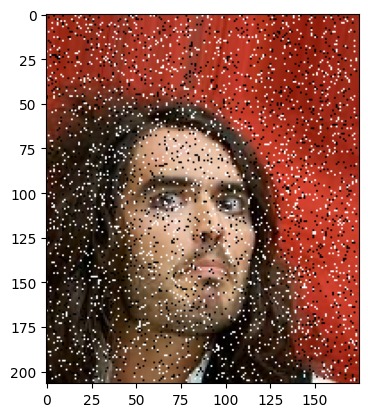

In [8]:
import matplotlib.pyplot as plt
plt.imshow(noise_data[0])

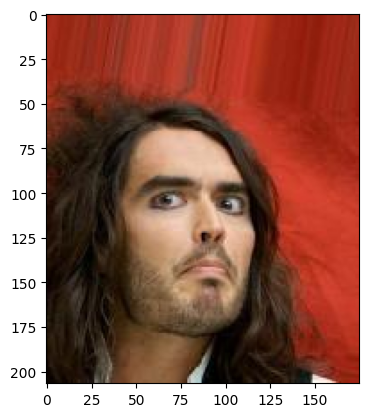

In [9]:
plt.imshow(train_1[0])